# HW 1 585 
Shabab Ahmed 

# Problem 1:

Vandermonde Matrix:

We use the Python equivalent of the MATLAB code in Section 1.5 to compute the Vandermonde coefficients. We will use this code to verify the coefficients computed solves the linear system in Problem(1). 

In [2]:
%matplotlib inline

In [3]:
from pylab import *
from scipy.special import factorial

In [4]:
def fdcoeffV(k,xbar,x):
    x = array(x)  # in case a list or tuple passed in, convert to numpy array
    n = len(x)
    if k >=n:
        raise ValueError('*** len(x) must be larger than k')
        
    A = ones((n,n))
    xrow = x - xbar  # displacement vector
    
    for i in range(1,n):
        A[i,:] = (xrow**i) / factorial(i)
      
    condA = cond(A)  # condition number
    if condA > 1e8:
        print("Warning: condition number of Vandermonde matrix is approximately %.1e" % condA)
        
    b = zeros(x.shape)
    b[k] = 1.
    
    c = solve(A,b)
    
    return c

We will apply the above code to our particular case. We will look at the fourth derivative $u^{(4)}(x_0)$ with a 5-point stencil. We use the interval $[-2,2]$ and let $x_0 = 0$. The fdcoeff function outputs vector $c$ which contains the coefficients of the linear combination. They are of the form $\frac{k}{h^4}$ where $k$ is weight of each $u(x_j)$. We chose the interval in such a way that $h = 1$ and so we just get the weights. The coefficients in general will have a $h^4$ in the denominator. 

In [5]:
k = 4    # fourth derivative 
xbar = 0 # x_0
a = -2 # left hand boundary
b = 2 # right hand boundary
m = 5 # number of stencil points
x = linspace(a,b, m) # creating the stencil
h = mean(diff(x)) # calculating h
c = fdcoeffV(k, xbar, x)
print(c)


[ 1. -4.  6. -4.  1.]


We now test that these coefficients solve our linear system in Problem 1. We first test it for our current value of $h$, but then we use different values of $h$ to ensure that we up getting $f$ after being multiplied by the Vandermonde matrix. 

In [6]:
A = array([[1.,1.,1.,1.,1.],[-2.,-1.,0.,1.,2.],[2.,0.5,0.,0.5,2.],[(-4/3),(-1/6),0.,(1/6),(4/3)]\
           ,[(h**4)*(2/3.),(h**4)*(1/24.),0.,(h**4)*(1/24),(h**4)*(2/3)]]) # Vandermonde matrix

F_1 = A@c
print(F_1)

h = 0.1 # different h 
c = array([1., -4., 6., -4., 1.])/(h**4)
A = array([[1.,1.,1.,1.,1.],[-2.,-1.,0.,1.,2.],[2.,0.5,0.,0.5,2.],[(-4/3),(-1/6),0.,(1/6),(4/3)]\
           ,[(h**4)*(2/3.),(h**4)*(1/24.),0.,(h**4)*(1/24),(h**4)*(2/3)]]) # Vandermonde matrix
F_2 = A@c
print(F_2)

h = 0.25 # different h
c = array([1., -4., 6., -4., 1.])/(h**4)
A = array([[1.,1.,1.,1.,1.],[-2.,-1.,0.,1.,2.],[2.,0.5,0.,0.5,2.],[(-4/3),(-1/6),0.,(1/6),(4/3)]\
           ,[(h**4)*(2/3.),(h**4)*(1/24.),0.,(h**4)*(1/24),(h**4)*(2/3)]]) # Vandermonde matrix
F_3 = A@c
print(F_3)

h =0.5 # different h
c = array([1., -4., 6., -4., 1.])/(h**4)
A = array([[1.,1.,1.,1.,1.],[-2.,-1.,0.,1.,2.],[2.,0.5,0.,0.5,2.],[(-4/3),(-1/6),0.,(1/6),(4/3)]\
           ,[(h**4)*(2/3.),(h**4)*(1/24.),0.,(h**4)*(1/24),(h**4)*(2/3)]]) # Vandermonde matrix
F_4 = A@c
print(F_4)

h=0.75
# different h
c = array([1., -4., 6., -4., 1.])/(h**4)
A = array([[1.,1.,1.,1.,1.],[-2.,-1.,0.,1.,2.],[2.,0.5,0.,0.5,2.],[(-4/3),(-1/6),0.,(1/6),(4/3)]\
           ,[(h**4)*(2/3.),(h**4)*(1/24.),0.,(h**4)*(1/24),(h**4)*(2/3)]]) # Vandermonde matrix
F_5 = A@c
print(F_5)

[0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1.]


We can see that we get $f$ back for different values of $h$. So the coefficients provided by the fdcoeffV function satisfies the linear system we had in Problem 1.

# Problem 2

We look at the errors in our approximation from Problem 1. 

In [7]:
u = lambda x: sin(2*x)
u4 = lambda x: 16*sin(2*x)
u6 =lambda x: -64*sin(2*x)


In [8]:
x0 = 1.
u4_true = u4(x0) #true solution
h0 = 0.1
stencil_points = array([-2,-1,0,1,2])
c = array([1.,-4.,6.,-4.,1.])
h_vals = []
errors = []
print('\n    h                 error ')
for n in range(10):
    h = h0 / 2**n
    h_vals.append(h)
    x = x0 + h*stencil_points
    u4_approx = dot(c,u(x)) / h**4
    error = abs(u4_approx - u4_true) #observed error
    errors.append(error)
    print('%10.8f   %20.16f' % (h,error))
   


    h                 error 
0.10000000     0.0967012731628500
0.05000000     0.0242297537095180
0.02500000     0.0060608476143358
0.01250000     0.0015154341109707
0.00625000     0.0003786976104863
0.00312500     0.0001009015487767
0.00156250     0.0001591092096902
0.00078125     0.0007551556574441
0.00039063     0.0004571324335672
0.00019531     0.3580850010859091


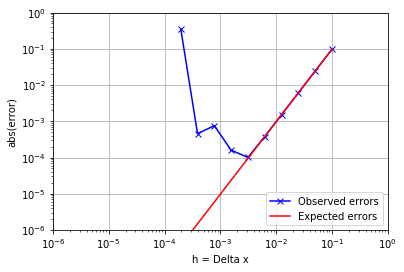

In [10]:
loglog(h_vals, errors, 'bx-', label='Observed errors')
xlim(1e-6,1)
ylim(1e-6,1)
grid(True)
xlabel('h = Delta x')
ylabel('abs(error)')

eref = 1/6. * array(h_vals)**2 * abs(u6(x0)) #expected error
loglog(h_vals, eref, 'r-', label='Expected errors')
legend(loc='lower right')

The expected error follows the observed error closely until $h$ becomes smaller than 0.00312500.